![alt bandit](../images/policy_iteration.png)


### Policy Evaluation (Prediction)

<div dir="rtl">
به مرحله محاسبه state value function برای یک policy، policy evaluation گفته میشه، که تخمین expected discounted future return برای هر state هست. Prediction
</div>

### Policy Iteration (Control)

<div dir="rtl">
در مقابل prediction ما میخواهیم به صورت متناوب policy رو بهتر کنیم و این برمیگرده به تخمین هایی که state-value function انجام میده. Control
    
</div>

In [62]:
# Grid World
import numpy as np
discount = 1.
world_size = 4
actions = [[0,1], [1,0], [0,-1], [-1,0]]

action_prob = 0.25
terminal_states = [[0,0], [world_size-1, world_size-1]]

def step(state, action, world_size):
    next_state = [state[0]+ action[0], state[1]+action[1]]
    if state in terminal_states:
        return state, 0
    if 0<=next_state[0]<world_size and 0<=next_state[1]<world_size:
        return next_state, -1
    else:
        return state, -1
    
itr = 0
new_Q = np.zeros((world_size, world_size))

# Policy Evaluation
while True:
    old_Q = new_Q.copy()
    for i in range(world_size):
        for j in range(world_size):
            value = 0
            state = [i,j]
            for action in actions:
                next_state, reward = step(state, action, world_size) 
                value += action_prob*( reward + discount*old_Q[next_state[0],next_state[1]])
            new_Q[i,j] = value
    diff = abs(old_Q-new_Q).max()
    if diff < 1e-4:
        break
    itr+=1
    if itr%50 == 0:
        print('iteration:{}, max_diff:{}'.format(itr, diff))

print('Optimal Q')

for r in new_Q:
    print(r)

iteration:50, max_diff:0.08225065631786421
iteration:100, max_diff:0.005347386022364731
iteration:150, max_diff:0.0003476511739428645
Optimal Q
[  0.         -13.99893866 -19.99842728 -21.99824003]
[-13.99893866 -17.99861452 -19.9984378  -19.99842728]
[-19.99842728 -19.9984378  -17.99861452 -13.99893866]
[-21.99824003 -19.99842728 -13.99893866   0.        ]


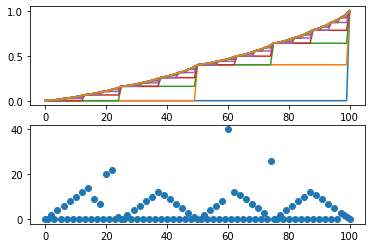

In [108]:
#Gambler
import matplotlib.pyplot as plt
goal = 100
V = np.zeros(goal+1)
V[goal] =1
states = np.arange(goal+1)
value_estimates = []
head_prob=0.4

# Value Iteration
while True:
    old_V = V.copy()
    value_estimates.append(old_V)
    for state in states[1:]:
        actions  = np.arange(min(state, goal-state)+1)
        action_values = []
        for action in actions:
            action_values.append(head_prob*old_V[state+action] + (1-head_prob)*old_V[state-action])
        V[state] = np.max(action_values)
    max_diff = abs(V-old_V).max()
    if max_diff < 1e-9:
        value_estimates.append(V)
        break

# optimal Policy using optimal V
policy = np.zeros(goal+1)
for state in states[1:]:
    actions = np.arange(min(state, goal-state)+1)
    action_values=[]
    for action in actions:
        action_values.append(head_prob*V[state+action] + (1-head_prob)*V[state-action])
    policy[state] = actions[np.argmax(action_values)]

plt.subplot(2,1,1)
for i, state_value in enumerate(value_estimates):
    plt.plot(state_value, label=f"{i}")
plt.subplot(2,1,2)
plt.scatter(states,policy)
